In [1]:
#ライブラリのインポート
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plot
import time
import os
os.environ['TF_KERAS'] = '1'
import keras2onnx
import onnx

Can't import tf2onnx module, so the conversion on a model with any custom/lambda layer will fail!


In [2]:
#主要ライブラリのバージョンの確認
tensorflow.__version__
print(tensorflow.__version__)
keras.__version__
print(keras.__version__)
keras2onnx.__version__
print(keras2onnx.__version__)


2.2.0
2.3.0-tf
1.6.0


In [3]:
#手書き文字データ (学習用、テスト用) の読み込み
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#手書き文字データの確認
len(x_train)

x_train[0:10]

x_train[0]

len(x_test)

len(y_test)

10000

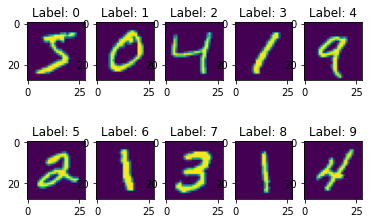

In [5]:
#学習用データを10だけ描画
for index in range(10):
    plot.subplot(2, 5, index + 1)
    plot.title("Label: " + str(index))
    plot.imshow(x_train[index].reshape(28, 28), cmap = None)

In [6]:
#0～255のデータを0.0～1.0の範囲に変換
max_value = 255
x_train, x_test = x_train / max_value, x_test / max_value

#変換後のデータを確認
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
#ディープ ラーニングの各レイヤーを設定したモデルを作成
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512),
    keras.layers.Activation('relu'),
    keras.layers.Dense(512),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10),
    keras.layers.Activation('softmax')
])

2022-07-04 06:30:17.968303: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-07-04 06:30:18.283265: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-04 06:30:18.283326: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (compute202207): /proc/driver/nvidia/version does not exist
2022-07-04 06:30:18.285316: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-07-04 06:30:18.362125: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2593905000 Hz
2022-07-04 06:30:18.362583: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f5fa8000b20 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
20

In [8]:
#モデルをコンパイル
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [9]:
#モデルを訓練
model.fit(x_train, y_train, epochs = 20)

2022-07-04 06:30:42.357420: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1925 - accuracy: 0.9418
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0862 - accuracy: 0.9736
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0593 - accuracy: 0.9812
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0448 - accuracy: 0.9857
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0388 - accuracy: 0.9873
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 

In [10]:
#モデルの評価
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1607 - accuracy: 0.9802


[0.16073791682720184, 0.9801999926567078]

In [11]:
#テスト データの確認
y_test[0:10]

x_test[0:10]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

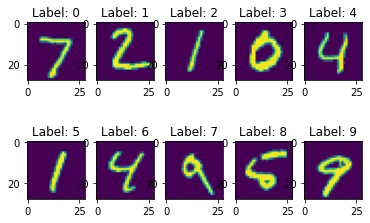

In [12]:
#テスト データを10だけ描画
for index in range(10):
    plot.subplot(2, 5, index + 1)
    plot.title("Label: " + str(index))
    plot.imshow(x_test[index].reshape(28, 28), cmap = None)

In [13]:
#予想の結果
predict_results = model.predict(x_test[0:10])
predict_results

predict_result_list = list(map(lambda result: result.argmax(), predict_results))
predict_result_list

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [14]:
#モデルの概要の確認
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5

In [15]:
#モデル保存用のフォルダーのパス
saved_model_path = "./saved_models/{}".format(int(time.time()))
saved_model_path

'./saved_models/1656916366'

In [16]:
#モデルを TensorFlow のフォーマットで保存する
tensorflow.keras.models.save_model(model, saved_model_path, save_format="tf")

2022-07-04 06:32:46.540832: W tensorflow/python/util/util.cc:329] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [17]:
#モデルを Keras のフォーマットで保存する
model.save(saved_model_path + '/mnist_model.h5')

In [18]:
#ONNXフォーマットに変換
onnx_model = keras2onnx.convert_keras(model, model.name)

The maximum opset needed by this model is only 9.


In [19]:
#モデルをONNXフォーマットで保存する
onnx_model_file = saved_model_path + '/mnist_model.onnx'
onnx.save_model(onnx_model, onnx_model_file)